# Load data

In [127]:
import pandas as pd
import numpy as np
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
all = pd.concat([train, test], axis = 0)
transactions = pd.read_csv("data/transactions.csv")
holiday_events = pd.read_csv("data/holidays_events.csv")
stores = pd.read_csv("data/stores.csv")

## train

In [128]:
train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [129]:
test

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [130]:
all

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0
...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,NaN,1
28508,3029396,2017-08-31,9,PREPARED FOODS,NaN,0
28509,3029397,2017-08-31,9,PRODUCE,NaN,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9


In [131]:
train["family"].value_counts()

AUTOMOTIVE                    90936
HOME APPLIANCES               90936
SCHOOL AND OFFICE SUPPLIES    90936
PRODUCE                       90936
PREPARED FOODS                90936
POULTRY                       90936
PLAYERS AND ELECTRONICS       90936
PET SUPPLIES                  90936
PERSONAL CARE                 90936
MEATS                         90936
MAGAZINES                     90936
LIQUOR,WINE,BEER              90936
LINGERIE                      90936
LAWN AND GARDEN               90936
LADIESWEAR                    90936
HOME CARE                     90936
HOME AND KITCHEN II           90936
BABY CARE                     90936
HOME AND KITCHEN I            90936
HARDWARE                      90936
GROCERY II                    90936
GROCERY I                     90936
FROZEN FOODS                  90936
EGGS                          90936
DELI                          90936
DAIRY                         90936
CLEANING                      90936
CELEBRATION                 

In [132]:
train["family"].value_counts().values

array([90936, 90936, 90936, 90936, 90936, 90936, 90936, 90936, 90936,
       90936, 90936, 90936, 90936, 90936, 90936, 90936, 90936, 90936,
       90936, 90936, 90936, 90936, 90936, 90936, 90936, 90936, 90936,
       90936, 90936, 90936, 90936, 90936, 90936])

## transactions

In [133]:
transactions

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


* 일별 store별 거래량
* past covariates

## Holiday

In [134]:
holiday_events

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [135]:
# https://www.kaggle.com/code/ekrembayar/holiday_events-events-data-manipulation-time-features/notebook
# Deal multiple holiday
# 확인 후 리팩토링 필요

tr1 = holiday_events[(holiday_events.type == "Holiday") & (holiday_events.transferred == True)].drop("transferred", axis = 1).reset_index(drop = True)
tr2 = holiday_events[(holiday_events.type == "Transfer")].drop("transferred", axis = 1).reset_index(drop = True)
tr = pd.concat([tr1,tr2], axis = 1)
tr = tr.iloc[:, [5,1,2,3,4]]

holiday_events = holiday_events[(holiday_events.transferred == False) & (holiday_events.type != "Transfer")].drop("transferred", axis = 1)
holiday_events = holiday_events.append(tr).reset_index(drop = True)


# Additional Holidays
# ------------------------------------------------------
holiday_events["description"] = holiday_events["description"].str.replace("-", "").str.replace("+", "").str.replace('\d+', '')
holiday_events["type"] = np.where(holiday_events["type"] == "Additional", "Holiday", holiday_events["type"])

# Bridge Holidays
# ------------------------------------------------------
holiday_events["description"] = holiday_events["description"].str.replace("Puente ", "")
holiday_events["type"] = np.where(holiday_events["type"] == "Bridge", "Holiday", holiday_events["type"])

 
# Work Day Holidays, that is meant to payback the Bridge.
# ------------------------------------------------------
work_day = holiday_events[holiday_events.type == "Work Day"]  
holiday_events = holiday_events[holiday_events.type != "Work Day"]  


# Split
# ------------------------------------------------------

# Events are national
events = holiday_events[holiday_events.type == "Event"].drop(["type", "locale", "locale_name"], axis = 1).rename({"description":"events"}, axis = 1)

holiday_events = holiday_events[holiday_events.type != "Event"].drop("type", axis = 1)
regional = holiday_events[holiday_events.locale == "Regional"].rename({"locale_name":"state", "description":"holiday_regional"}, axis = 1).drop("locale", axis = 1).drop_duplicates()
national = holiday_events[holiday_events.locale == "National"].rename({"description":"holiday_national"}, axis = 1).drop(["locale", "locale_name"], axis = 1).drop_duplicates()
local = holiday_events[holiday_events.locale == "Local"].rename({"description":"holiday_local", "locale_name":"city"}, axis = 1).drop("locale", axis = 1).drop_duplicates()

# EVENTS
events["events"] =np.where(events.events.str.contains("futbol"), "Futbol", events.events)

<ipython-input-135-0cf954abafcd>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  holiday_events = holiday_events.append(tr).reset_index(drop = True)
<ipython-input-135-0cf954abafcd>:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  holiday_events["description"] = holiday_events["description"].str.replace("-", "").str.replace("+", "").str.replace('\d+', '')
<ipython-input-135-0cf954abafcd>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  holiday_events["description"] = holiday_events["description"].str.replace("-", "").str.replace("+", "").str.replace('\d+', '')


In [136]:
events.head()

,date,events
53,2013-05-12,Dia de la Madre
99,2014-05-11,Dia de la Madre
102,2014-06-12,Futbol
103,2014-06-15,Futbol
104,2014-06-20,Futbol


In [137]:
local.head()

,date,city,holiday_local
0,2012-03-02,Manta,Fundacion de Manta
2,2012-04-12,Cuenca,Fundacion de Cuenca
3,2012-04-14,Libertad,Cantonizacion de Libertad
4,2012-04-21,Riobamba,Cantonizacion de Riobamba
5,2012-05-12,Puyo,Cantonizacion del Puyo


In [138]:
national.head()

,date,holiday_national
14,2012-08-10,Primer Grito de Independencia
19,2012-11-02,Dia de Difuntos
20,2012-11-03,Independencia de Cuenca
29,2012-12-21,Navidad
31,2012-12-22,Navidad


In [139]:
regional.head()

,date,state,holiday_regional
1,2012-04-01,Cotopaxi,Provincializacion de Cotopaxi
7,2012-06-25,Imbabura,Provincializacion de Imbabura
21,2012-11-06,Santo Domingo de los Tsachilas,Provincializacion de Santo Domingo
22,2012-11-07,Santa Elena,Provincializacion Santa Elena
45,2013-04-01,Cotopaxi,Provincializacion de Cotopaxi


In [140]:
holiday_events = pd.concat([events, regional, national, local], axis = 0).reset_index(drop = True)

In [141]:
holiday_events

,date,events,state,holiday_regional,holiday_national,city,holiday_local
0,2013-05-12,Dia de la Madre,NaN,NaN,NaN,NaN,NaN
1,2014-05-11,Dia de la Madre,NaN,NaN,NaN,NaN,NaN
2,2014-06-12,Futbol,NaN,NaN,NaN,NaN,NaN
3,2014-06-15,Futbol,NaN,NaN,NaN,NaN,NaN
4,2014-06-20,Futbol,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
324,2017-12-08,NaN,NaN,NaN,NaN,Loja,Fundacion de Loja
325,2017-12-22,NaN,NaN,NaN,NaN,Salinas,Cantonizacion de Salinas
326,2017-04-13,NaN,NaN,NaN,NaN,Cuenca,Fundacion de Cuenca
327,2017-09-29,NaN,NaN,NaN,NaN,Ibarra,Fundacion de Ibarra


In [142]:
# convert datetime to str
# some additional date features
date_info = pd.DataFrame({"date": pd.date_range(start=all["date"].min(), end=all["date"].max())})

date_info["year"] = date_info["date"].dt.year
date_info["month"] = date_info["date"].dt.month
date_info["day"] = date_info["date"].dt.day
date_info["dayofweek"] = date_info["date"].dt.dayofweek
date_info["weekend"] = (date_info["dayofweek"] >= 5).astype(int)
date_info["week"] = date_info["date"].dt.week
date_info["quarter"] = date_info["date"].dt.quarter
date_info["season"] = date_info["month"] % 12 // 3 + 1

date_info["date"] = date_info["date"].astype(str)

<ipython-input-142-b45d043016cb>:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  date_info["week"] = date_info["date"].dt.week


## Stores

In [143]:
stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


# EDA

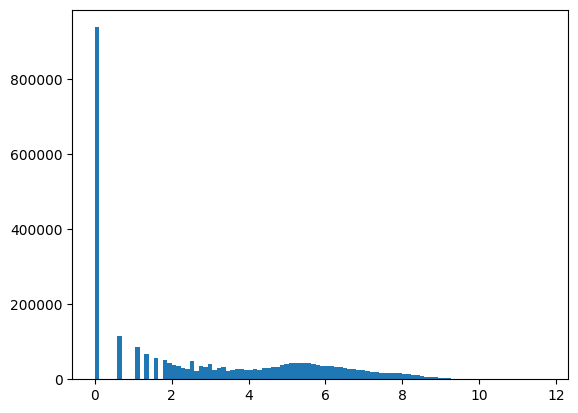

In [144]:
import matplotlib.pyplot as plt
plt.hist(np.log1p(all["sales"]), bins = 100)
plt.show()

## Make train

data
* holiday_events: known covariates
  * holiday_type, locale, locale_name, description, transferred
* stores: static metadata
  * store_nbr, city, state, store_type, cluster
* transactions: past covariates
  * transactions
* train, test
  * store_nbr, family: static metadata
  * sales: target
  * onpromotion: known covariates

In [145]:
# make train
merged = pd.merge(all, transactions, on=["date", "store_nbr"], how="left")
merged = pd.merge(merged, stores, on=["store_nbr"], how="left")
merged = pd.merge(merged, holiday_events, on=["date", "city", "state"], how="left")
merged = pd.merge(merged, date_info, on=["date"], how="left")

# 없는 값은 거래가 발생하지 않은 것으로 가정
merged["transactions"] = merged["transactions"].fillna(0)

In [146]:
# fill na
# TODO: Normal은 0으로 취급될 수 있게 변경 필요
merged["events"] = merged["events"].fillna("Normal")
merged["holiday_regional"] = merged["holiday_regional"].fillna("Normal")
merged["holiday_national"] = merged["holiday_national"].fillna("Normal")
merged["holiday_local"] = merged["holiday_local"].fillna("Normal")

In [147]:
# make item_id
merged["item_id"] = merged["family"] + "_" + merged["store_nbr"].astype(str)
merged

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type,...,holiday_local,year,month,day,dayofweek,weekend,week,quarter,season,item_id
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0.0,Quito,Pichincha,D,...,Normal,2013,1,1,1,0,1,1,1,AUTOMOTIVE_1
1,1,2013-01-01,1,BABY CARE,0.0,0,0.0,Quito,Pichincha,D,...,Normal,2013,1,1,1,0,1,1,1,BABY CARE_1
2,2,2013-01-01,1,BEAUTY,0.0,0,0.0,Quito,Pichincha,D,...,Normal,2013,1,1,1,0,1,1,1,BEAUTY_1
3,3,2013-01-01,1,BEVERAGES,0.0,0,0.0,Quito,Pichincha,D,...,Normal,2013,1,1,1,0,1,1,1,BEVERAGES_1
4,4,2013-01-01,1,BOOKS,0.0,0,0.0,Quito,Pichincha,D,...,Normal,2013,1,1,1,0,1,1,1,BOOKS_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029395,3029395,2017-08-31,9,POULTRY,NaN,1,0.0,Quito,Pichincha,B,...,Normal,2017,8,31,3,0,35,3,3,POULTRY_9
3029396,3029396,2017-08-31,9,PREPARED FOODS,NaN,0,0.0,Quito,Pichincha,B,...,Normal,2017,8,31,3,0,35,3,3,PREPARED FOODS_9
3029397,3029397,2017-08-31,9,PRODUCE,NaN,1,0.0,Quito,Pichincha,B,...,Normal,2017,8,31,3,0,35,3,3,PRODUCE_9
3029398,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,0.0,Quito,Pichincha,B,...,Normal,2017,8,31,3,0,35,3,3,SCHOOL AND OFFICE SUPPLIES_9


In [148]:
merged.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion',
       'transactions', 'city', 'state', 'type', 'cluster', 'events',
       'holiday_regional', 'holiday_national', 'holiday_local', 'year',
       'month', 'day', 'dayofweek', 'weekend', 'week', 'quarter', 'season',
       'item_id'],
      dtype='object')

In [149]:
# separate static and covariates
drop_cols = []
static_cols = ["store_nbr","family","type","cluster", "state", "city"]
known_covariates_cols = ["onpromotion", "events", "holiday_regional", "holiday_national", "holiday_local", "year", "month", "day", "dayofweek", "weekend", "week", "quarter", "season"]

static_features = merged[static_cols + ["item_id"]].drop_duplicates()
static_features.set_index("item_id", inplace=True)
merged = merged.drop(columns=drop_cols + static_cols)

In [150]:
merged["date"] = pd.to_datetime(merged["date"], format="%Y-%m-%d")
merged.sort_values(by=["item_id","date"], inplace=True)

In [151]:
static_features

,store_nbr,family,type,cluster,state,city
item_id,,,,,,
AUTOMOTIVE_1,1,AUTOMOTIVE,D,13,Pichincha,Quito
BABY CARE_1,1,BABY CARE,D,13,Pichincha,Quito
BEAUTY_1,1,BEAUTY,D,13,Pichincha,Quito
BEVERAGES_1,1,BEVERAGES,D,13,Pichincha,Quito
BOOKS_1,1,BOOKS,D,13,Pichincha,Quito
...,...,...,...,...,...,...
POULTRY_9,9,POULTRY,B,6,Pichincha,Quito
PREPARED FOODS_9,9,PREPARED FOODS,B,6,Pichincha,Quito
PRODUCE_9,9,PRODUCE,B,6,Pichincha,Quito


In [152]:
merged

,id,date,sales,onpromotion,transactions,events,holiday_regional,holiday_national,holiday_local,year,month,day,dayofweek,weekend,week,quarter,season,item_id
0,0,2013-01-01,0.0,0,0.0,Normal,Normal,Normal,Normal,2013,1,1,1,0,1,1,1,AUTOMOTIVE_1
1782,1782,2013-01-02,2.0,0,2111.0,Normal,Normal,Normal,Normal,2013,1,2,2,0,1,1,1,AUTOMOTIVE_1
3564,3564,2013-01-03,3.0,0,1833.0,Normal,Normal,Normal,Normal,2013,1,3,3,0,1,1,1,AUTOMOTIVE_1
5346,5346,2013-01-04,3.0,0,1863.0,Normal,Normal,Normal,Normal,2013,1,4,4,0,1,1,1,AUTOMOTIVE_1
7128,7128,2013-01-05,5.0,0,1509.0,Normal,Normal,Normal,Normal,2013,1,5,5,1,1,1,1,AUTOMOTIVE_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3022271,3022271,2017-08-27,NaN,0,0.0,Normal,Normal,Normal,Normal,2017,8,27,6,1,34,3,3,SEAFOOD_9
3024053,3024053,2017-08-28,NaN,0,0.0,Normal,Normal,Normal,Normal,2017,8,28,0,0,35,3,3,SEAFOOD_9
3025835,3025835,2017-08-29,NaN,0,0.0,Normal,Normal,Normal,Normal,2017,8,29,1,0,35,3,3,SEAFOOD_9
3027617,3027617,2017-08-30,NaN,0,0.0,Normal,Normal,Normal,Normal,2017,8,30,2,0,35,3,3,SEAFOOD_9


# Model test

In [153]:
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

timeseries_df = TimeSeriesDataFrame.from_data_frame(
    merged,
    id_column="item_id",
    timestamp_column="date"
)

In [154]:
timeseries_df = timeseries_df.to_regular_index(freq="D")
timeseries_df

id  sales  onpromotion  transactions  events  \
item_id      timestamp                                                         
AUTOMOTIVE_1 2013-01-01        0.0    0.0          0.0           0.0  Normal   
             2013-01-02     1782.0    2.0          0.0        2111.0  Normal   
             2013-01-03     3564.0    3.0          0.0        1833.0  Normal   
             2013-01-04     5346.0    3.0          0.0        1863.0  Normal   
             2013-01-05     7128.0    5.0          0.0        1509.0  Normal   
...                            ...    ...          ...           ...     ...   
SEAFOOD_9    2017-08-27  3022271.0    NaN          0.0           0.0  Normal   
             2017-08-28  3024053.0    NaN          0.0           0.0  Normal   
             2017-08-29  3025835.0    NaN          0.0           0.0  Normal   
             2017-08-30  3027617.0    NaN          0.0           0.0  Normal   
             2017-08-31  3029399.0    NaN          0.0           0.0  Normal   

                        holiday_regional holiday_national holiday_local  \
item_id      timestamp                                                    
AUTOMOTIVE_1 2013-01-01           Normal           Normal        Normal   
             2013-01-02           Normal           Normal        Normal   
             2013-01-03           Normal           Normal        Normal   
             2013-01-04           Normal           Normal        Normal   
             2013-01-05           Normal           Normal        Normal   
...                                  ...              ...           ...   
SEAFOOD_9    2017-08-27           Normal           Normal        Normal   
             2017-08-28           Normal           Normal        Normal   
             2017-08-29           Normal           Normal        Normal   
             2017-08-30           Normal           Normal        Normal   
             2017-08-31           Normal           Normal        Normal   

                           year  month   day  dayofweek  weekend  week  \
item_id      timestamp                                                   
AUTOMOTIVE_1 2013-01-01  2013.0    1.0   1.0        1.0      0.0   1.0   
             2013-01-02  2013.0    1.0   2.0        2.0      0.0   1.0   
             2013-01-03  2013.0    1.0   3.0        3.0      0.0   1.0   
             2013-01-04  2013.0    1.0   4.0        4.0      0.0   1.0   
             2013-01-05  2013.0    1.0   5.0        5.0      1.0   1.0   
...                         ...    ...   ...        ...      ...   ...   
SEAFOOD_9    2017-08-27  2017.0    8.0  27.0        6.0      1.0  34.0   
             2017-08-28  2017.0    8.0  28.0        0.0      0.0  35.0   
             2017-08-29  2017.0    8.0  29.0        1.0      0.0  35.0   
             2017-08-30  2017.0    8.0  30.0        2.0      0.0  35.0   
             2017-08-31  2017.0    8.0  31.0        3.0      0.0  35.0   

                         quarter  season  
item_id      timestamp                    
AUTOMOTIVE_1 2013-01-01      1.0     1.0  
             2013-01-02      1.0     1.0  
             2013-01-03      1.0     1.0  
             2013-01-04      1.0     1.0  
             2013-01-05      1.0     1.0  
...                          ...     ...  
SEAFOOD_9    2017-08-27      3.0     3.0  
             2017-08-28      3.0     3.0  
             2017-08-29      3.0     3.0  
             2017-08-30      3.0     3.0  
             2017-08-31      3.0     3.0  

[3036528 rows x 16 columns]

In [155]:
categorical_col = ["store_nbr", "family", "type", "cluster", "city", "state"]
for col in categorical_col:
    # encoding to number
    static_features[col] = static_features[col].astype("category")
    
categorical_col = ["events", "holiday_regional", "holiday_national", "holiday_local"]
for col in categorical_col:
    # FIXME: categorical로 둘 시 오류
    timeseries_df[col] = timeseries_df[col].astype("category").cat.codes.astype("category")

In [156]:
train_data, test_data = timeseries_df.split_by_time(pd.Timestamp("2017-08-16"))

train_data.static_features = static_features
test_data.static_features = static_features
train_data.head()

id  sales  onpromotion  transactions events  \
item_id      timestamp                                                     
AUTOMOTIVE_1 2013-01-01     0.0    0.0          0.0           0.0      0   
             2013-01-02  1782.0    2.0          0.0        2111.0      0   
             2013-01-03  3564.0    3.0          0.0        1833.0      0   
             2013-01-04  5346.0    3.0          0.0        1863.0      0   
             2013-01-05  7128.0    5.0          0.0        1509.0      0   

                        holiday_regional holiday_national holiday_local  \
item_id      timestamp                                                    
AUTOMOTIVE_1 2013-01-01                0                0             0   
             2013-01-02                0                0             0   
             2013-01-03                0                0             0   
             2013-01-04                0                0             0   
             2013-01-05                0                0             0   

                           year  month  day  dayofweek  weekend  week  \
item_id      timestamp                                                  
AUTOMOTIVE_1 2013-01-01  2013.0    1.0  1.0        1.0      0.0   1.0   
             2013-01-02  2013.0    1.0  2.0        2.0      0.0   1.0   
             2013-01-03  2013.0    1.0  3.0        3.0      0.0   1.0   
             2013-01-04  2013.0    1.0  4.0        4.0      0.0   1.0   
             2013-01-05  2013.0    1.0  5.0        5.0      1.0   1.0   

                         quarter  season  
item_id      timestamp                    
AUTOMOTIVE_1 2013-01-01      1.0     1.0  
             2013-01-02      1.0     1.0  
             2013-01-03      1.0     1.0  
             2013-01-04      1.0     1.0  
             2013-01-05      1.0     1.0

In [157]:
train_data["sales"] = np.log1p(train_data["sales"])

In [158]:
# christmas 등
train_data = train_data.fill_missing_values('pad', value = 0)

In [159]:
# FIXME: ignore_time_index 미설정시 오류
predictor = TimeSeriesPredictor(known_covariates_names=known_covariates_cols, target="sales", prediction_length=16, validation_splitter="last_window",
                                eval_metric="RMSE")

No path specified. Models will be saved in: "AutogluonModels/ag-20230602_062348/"


In [160]:
predictor.fit(train_data=train_data, hyperparameters={
      "ETS": {}
   })

================ TimeSeriesPredictor ================
TimeSeriesPredictor.fit() called
Fitting with arguments:
{'enable_ensemble': True,
 'evaluation_metric': 'RMSE',
 'hyperparameter_tune_kwargs': None,
 'hyperparameters': {'ETS': {}},
 'prediction_length': 16,
 'random_seed': None,
 'target': 'sales',
 'time_limit': None}
Provided training data set with 3008016 rows, 1782 items (item = single time series). Average time series length is 1688.0.
Training artifacts will be saved to: /Users/mysunk/Documents/PJT/automl_study/msun/AutogluonModels/ag-20230602_062348
AutoGluon will save models to AutogluonModels/ag-20230602_062348/
AutoGluon will gauge predictive performance using evaluation metric: 'RMSE'
	This metric's sign has been flipped to adhere to being 'higher is better'. The reported score can be multiplied by -1 to get the metric value.

Provided dataset contains following columns:
	target:           'sales'
	known covariates: ['onpromotion', 'events', 'holiday_regional', 'holiday

In [161]:
result = predictor.predict(train_data, known_covariates=test_data[known_covariates_cols])

Global seed set to 123
Model not specified in predict, will default to the model with the best validation score: ETS


In [163]:
result

mean       0.1       0.2       0.3       0.4  \
item_id      timestamp                                                      
AUTOMOTIVE_1 2017-08-16  1.640989  0.866148  1.132135  1.323931  1.487813   
             2017-08-17  1.547558  0.772601  1.038628  1.230452  1.394358   
             2017-08-18  1.688892  0.913820  1.179887  1.371739  1.535670   
             2017-08-19  1.714124  0.938937  1.205043  1.396924  1.560879   
             2017-08-20  1.037677  0.262375  0.528520  0.720429  0.884409   
...                           ...       ...       ...       ...       ...   
SEAFOOD_9    2017-08-27  3.250993  2.564990  2.800481  2.970286  3.115378   
             2017-08-28  2.868835  2.176698  2.414294  2.585618  2.732008   
             2017-08-29  2.822047  2.123828  2.363513  2.536342  2.684018   
             2017-08-30  2.745869  2.039691  2.282107  2.456907  2.606267   
             2017-08-31  2.730037  2.017894  2.262358  2.438634  2.589255   

                              0.5       0.6       0.7       0.8       0.9  
item_id      timestamp                                                     
AUTOMOTIVE_1 2017-08-16  1.640989  1.794166  1.958048  2.149844  2.415831  
             2017-08-17  1.547558  1.700757  1.864664  2.056488  2.322515  
             2017-08-18  1.688892  1.842114  2.006045  2.197898  2.463964  
             2017-08-19  1.714124  1.867369  2.031324  2.223205  2.489311  
             2017-08-20  1.037677  1.190945  1.354924  1.546834  1.812979  
...                           ...       ...       ...       ...       ...  
SEAFOOD_9    2017-08-27  3.250993  3.386607  3.531700  3.701505  3.936996  
             2017-08-28  2.868835  3.005662  3.152052  3.323376  3.560972  
             2017-08-29  2.822047  2.960077  3.107753  3.280582  3.520266  
             2017-08-30  2.745869  2.885472  3.034832  3.209631  3.452048  
             2017-08-31  2.730037  2.870819  3.021440  3.197715  3.442179  

[28512 rows x 10 columns]

In [125]:
sample_submission = pd.read_csv("data/sample_submission.csv")
test_data["sales"] = np.expm1(result["mean"])
submission = pd.merge(sample_submission[["id"]], test_data.reset_index()[["id", "sales"]], on="id", how="left")

In [174]:
submission.to_csv("result/submit_1.csv", index=False) # 0.40607